In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [9]:
# Load data
df = pd.read_csv("../data/BrentOilPrices.csv", parse_dates=['Date'])
df = df.sort_values('Date').reset_index(drop=True)

/tmp/ipykernel_2705/43061764.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("../data/BrentOilPrices.csv", parse_dates=['Date'])


In [10]:
# Basic info
print("=== Data Overview ===")
print(df.info())
print("\n=== Descriptive Stats ===")
print(df.describe())

# Convert Price to numeric (handling potential string formatting)
df['Price'] = df['Price'].astype(str).str.replace(',', '').astype(float)

=== Data Overview ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9011 non-null   datetime64[ns]
 1   Price   9011 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 140.9 KB
None

=== Descriptive Stats ===
                                Date        Price
count                           9011  9011.000000
mean   2005-02-10 23:46:53.760958720    48.420782
min              1987-05-20 00:00:00     9.100000
25%              1996-03-20 12:00:00    19.050000
50%              2005-02-02 00:00:00    38.570000
75%              2014-01-09 12:00:00    70.090000
max              2022-11-14 00:00:00   143.950000
std                              NaN    32.860110


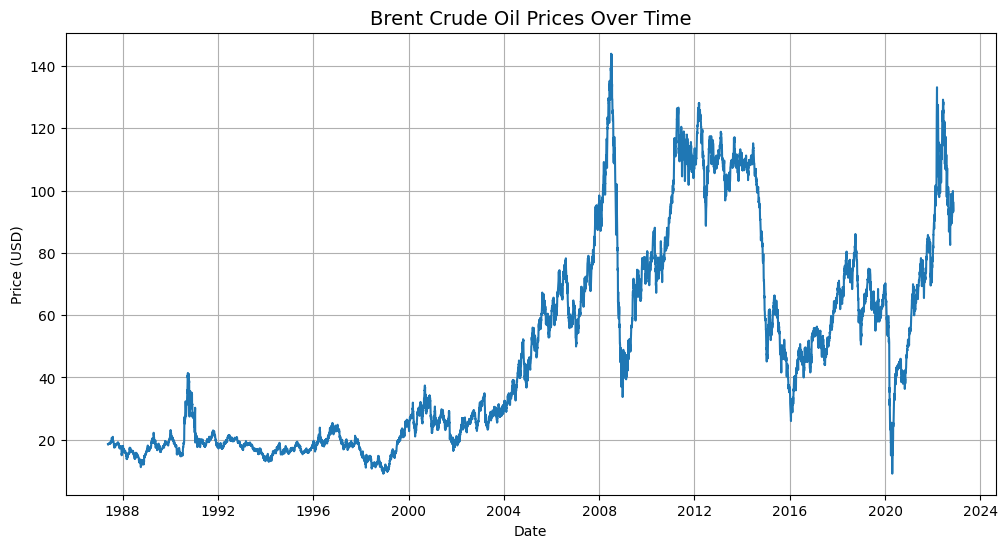

In [11]:
# Time series plot
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Price'])
plt.title('Brent Crude Oil Prices Over Time', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

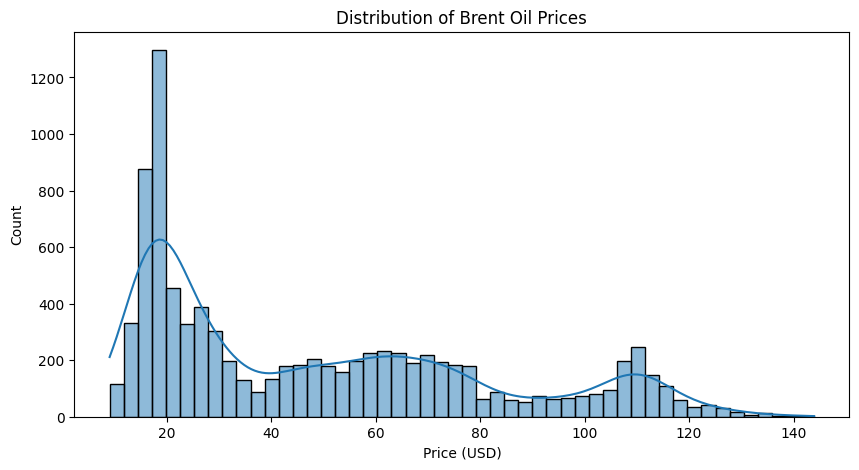

In [12]:
# Distribution of prices
plt.figure(figsize=(10, 5))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Distribution of Brent Oil Prices')
plt.xlabel('Price (USD)')
plt.show()

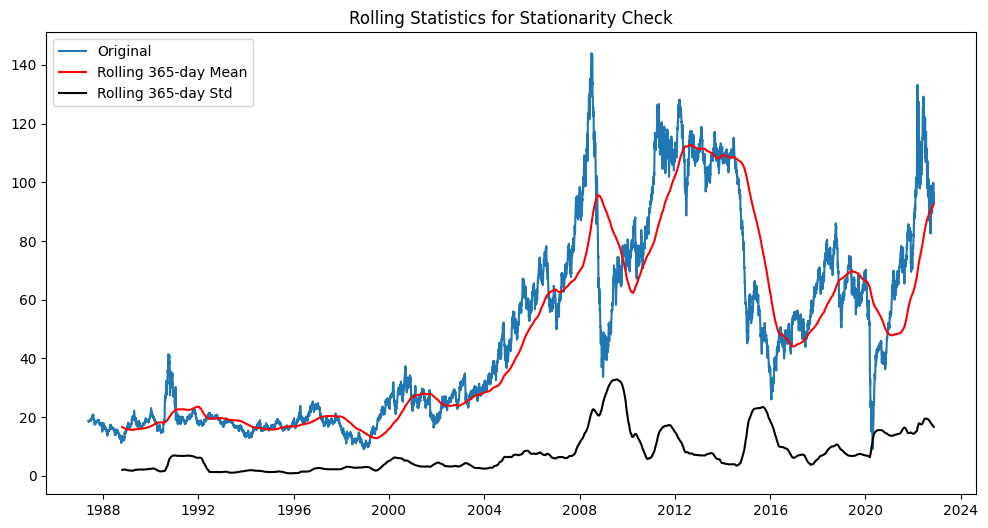

In [13]:
# Rolling statistics to check stationarity
window = 365  # 1-year window
rolling_mean = df['Price'].rolling(window=window).mean()
rolling_std = df['Price'].rolling(window=window).std()

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Price'], label='Original')
plt.plot(df['Date'], rolling_mean, label=f'Rolling {window}-day Mean', color='red')
plt.plot(df['Date'], rolling_std, label=f'Rolling {window}-day Std', color='black')
plt.legend()
plt.title('Rolling Statistics for Stationarity Check')
plt.show()

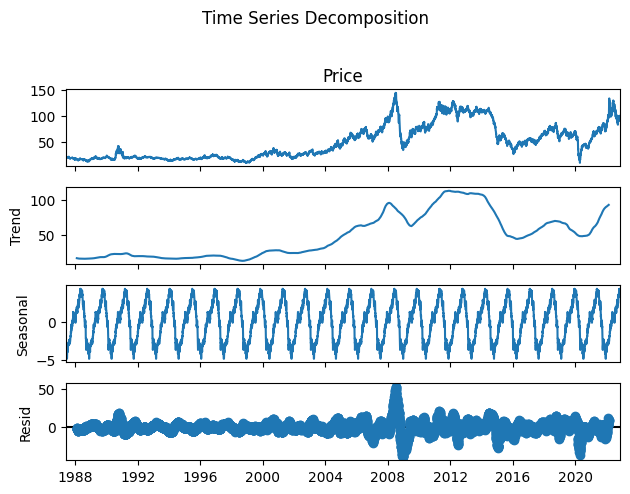

In [14]:
# Decomposition (assuming monthly data - adjust frequency as needed)
decomposition = seasonal_decompose(df.set_index('Date')['Price'], 
                                 period=365,  # yearly seasonality
                                 model='additive') 
decomposition.plot()
plt.suptitle('Time Series Decomposition', y=1.02)
plt.tight_layout()
plt.show()

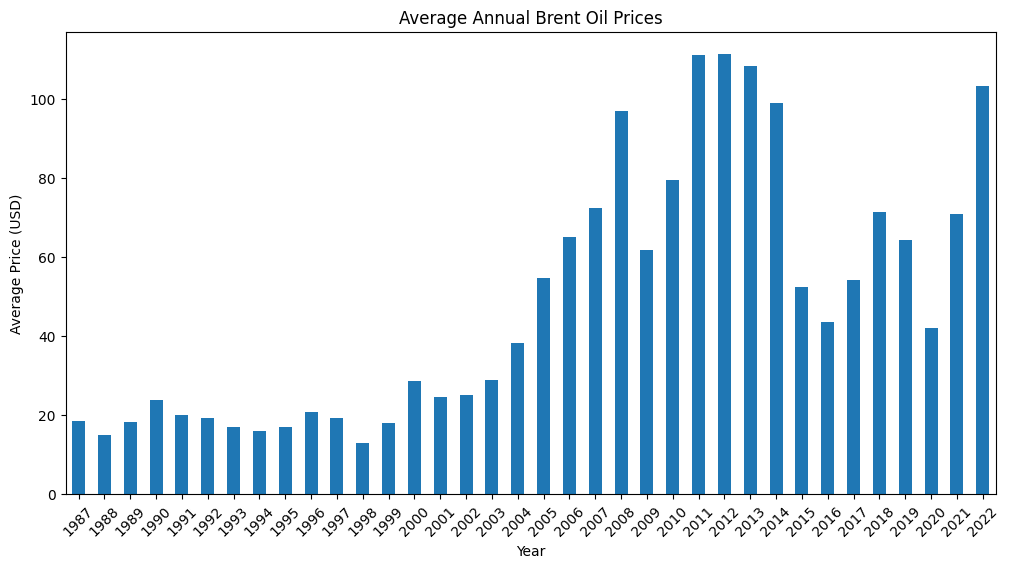

In [15]:
# Yearly averages
df['Year'] = df['Date'].dt.year
yearly_avg = df.groupby('Year')['Price'].mean()

plt.figure(figsize=(12, 6))
yearly_avg.plot(kind='bar')
plt.title('Average Annual Brent Oil Prices')
plt.xlabel('Year')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45)
plt.show()